# Time Series Prediction of the Energy Consumption of a Single Household
- The source of the data can be found [here](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#)
- Libraries will imported as needed

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
file_location = "../data/household_power_consumption.txt"
print("First we take a peek to the data:\n")
os.system("head " + file_location)

First we take a peek to the data:

Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000
16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000
16/12/2006;17:26:00;5.374;0.498;233.290;23.000;0.000;2.000;17.000
16/12/2006;17:27:00;5.388;0.502;233.740;23.000;0.000;1.000;17.000
16/12/2006;17:28:00;3.666;0.528;235.680;15.800;0.000;1.000;17.000
16/12/2006;17:29:00;3.520;0.522;235.020;15.000;0.000;2.000;17.000
16/12/2006;17:30:00;3.702;0.520;235.090;15.800;0.000;1.000;17.000
16/12/2006;17:31:00;3.700;0.520;235.220;15.800;0.000;1.000;17.000
16/12/2006;17:32:00;3.668;0.510;233.990;15.800;0.000;1.000;17.000


0

- From the above we can see we can parse the data as a csv with delimeter given by ";"

In [3]:
raw_data = pd.read_csv(file_location, sep=";")
print(f"\nThe number of entries of the dataset is: {len(raw_data)}")
print("\nThe raw dataframe looks as follows:\n")
raw_data.head()


The number of entries of the dataset is: 2075259

The raw dataframe looks as follows:



/tmp/ipykernel_39655/2654060262.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(file_location, sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
print("\nThe last entries of the dataframe are:\n")
raw_data.tail()


The last entries of the dataframe are:



,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


- We have almost four years of minute-measured data

## Data Description
- From the description [data description](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#), we have:
1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.
- We are mostly intersted on the average energy consumption, therefore we will retain only the **Global_active_power** droping all other columns.

## Data Preprocessing
- We are mostly interested on the global energy consumption of the household, therefore we will drop unnecessary values and join the time-based measurements in a single value (unique value: Time_stamp):

In [5]:
raw_data["Time_stamp"] = raw_data["Date"] + "-" + raw_data["Time"]
raw_data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Time_stamp
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006-17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006-17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006-17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006-17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006-17:28:00


In [6]:
raw_data.drop(raw_data.columns[[0, 1, 3, 4, 5, 6, 7, 8]], axis = 1, inplace = True)
raw_data.head()

,Global_active_power,Time_stamp
0,4.216,16/12/2006-17:24:00
1,5.360,16/12/2006-17:25:00
2,5.374,16/12/2006-17:26:00
3,5.388,16/12/2006-17:27:00
4,3.666,16/12/2006-17:28:00


- From the previous analysis we got a warning where there is no consistency on the data types, which is most likely related to the missing values (manual exploration):

In [7]:
raw_data.loc[[190499]]

,Global_active_power,Time_stamp
190499,?,28/4/2007-00:23:00


### Dealing with missing values: Detection and Substitution

- The percentage of missing values is of about $\approx$ 1.25 %. Removing such a values (which are contiguos) could affect the statistics our dataset when dealing with a time series problem. The safest option is to substitute those missing values by the mean value so they will not alter the statistics of our dataset.

In [8]:
raw_data["Global_active_power"].replace('?', '0', inplace=True)
raw_data = raw_data.astype({"Global_active_power": float})
raw_data.dtypes

Global_active_power    float64
Time_stamp              object
dtype: object

- Now that we have changed all values to zero (no real measurements have a zero energy consumption), therefore we can now perform the following substitution

In [9]:
raw_data.replace(0, raw_data["Global_active_power"].mean(), inplace=True)

In [10]:
raw_data.loc[[190499]]

,Global_active_power,Time_stamp
190499,1.07795,28/4/2007-00:23:00


- We have almost four years worth of data, we can visualize the data at this point:

In [11]:
# plots energy vs time considering ONLY minute step data
def plot_energy_vs_time(n_points, given_data):
    if (n_points == 60):
        feedback = "1 hour"
    elif (n_points == 60*24):
        feedback = "1 day"
    elif (n_points == 60*24*7):
        feedback = "1 week"
    elif (n_points == 60*24*30):
        feedback = "1 month"
    else:
        feedback = str(n_points) + " minutes"
    data_frame = given_data.head(n_points)
    plt.figure(figsize=(40,20), dpi=40)
    plt.locator_params(axis='x', nbins=3)
    x_ticks = np.arange(0, n_points, n_points / 4)
    plt.xticks(x_ticks)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.plot(data_frame["Time_stamp"], data_frame["Global_active_power"])
    plt.xlabel("Time Stamp", fontsize=40)
    plt.ylabel("Energy Consumption (kW-h)", fontsize=40)
    plt.title(f"Energy Consumption Single French Household along " + feedback, fontsize=40)
    plt.show()

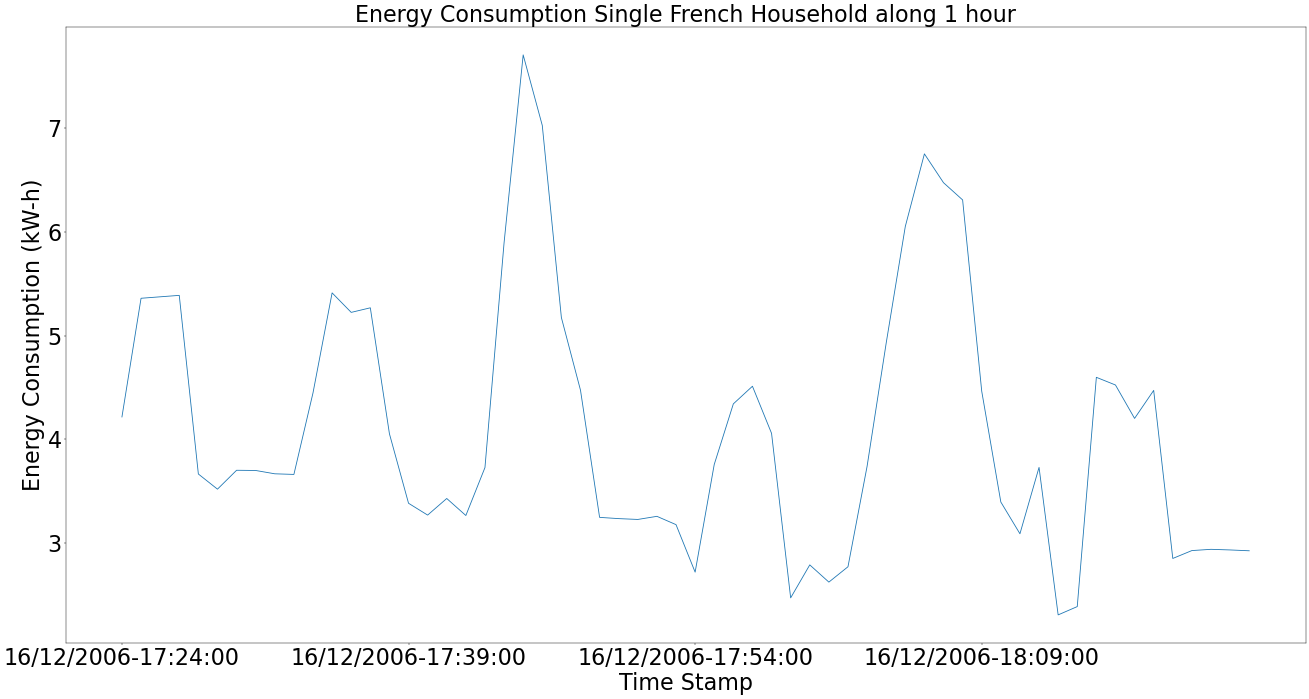

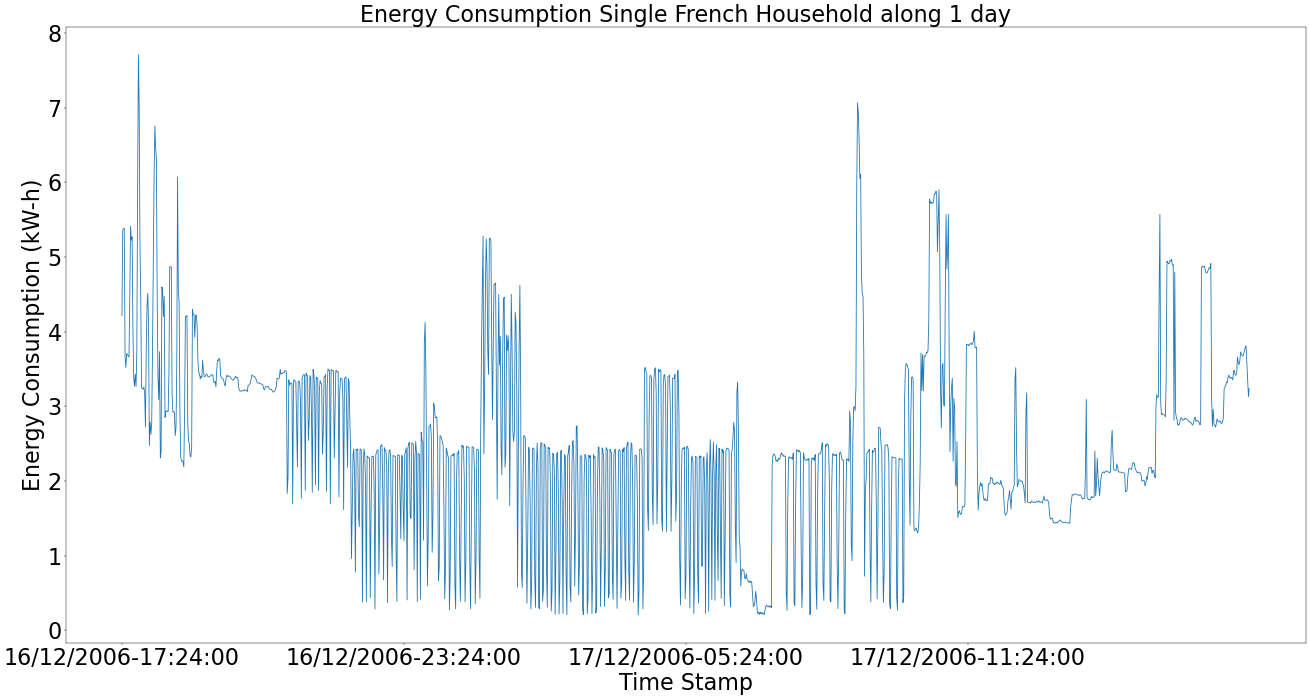

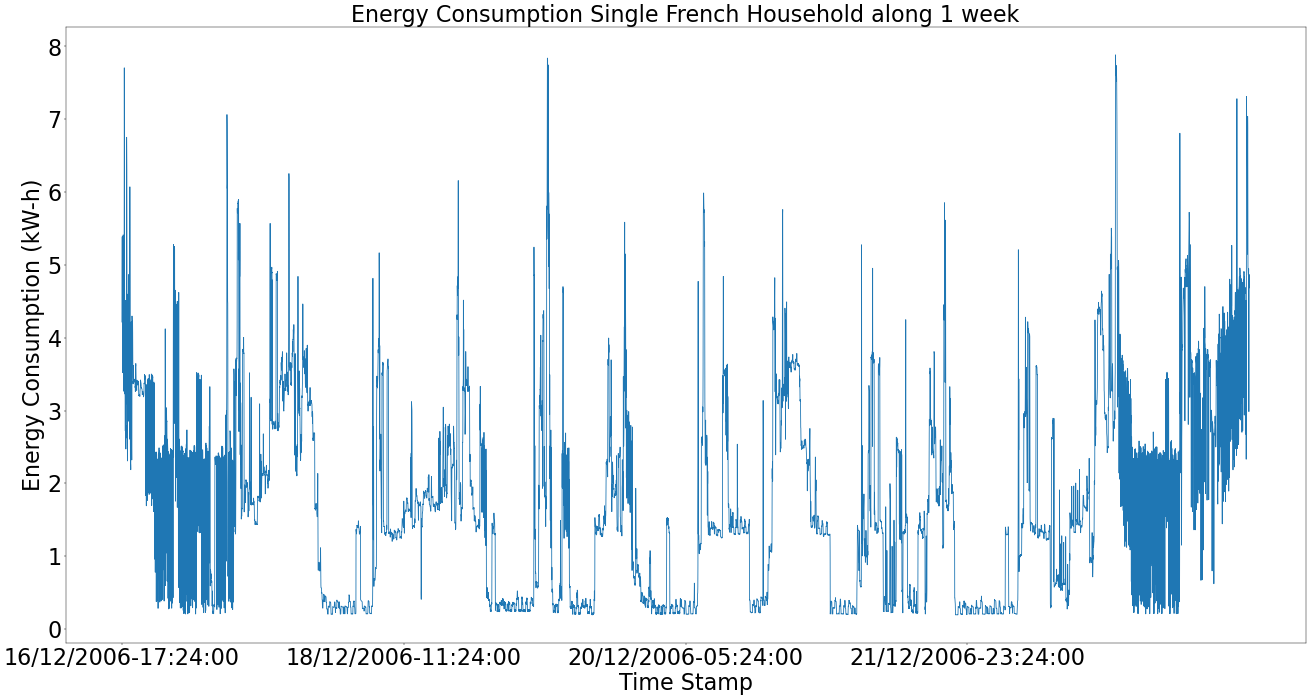

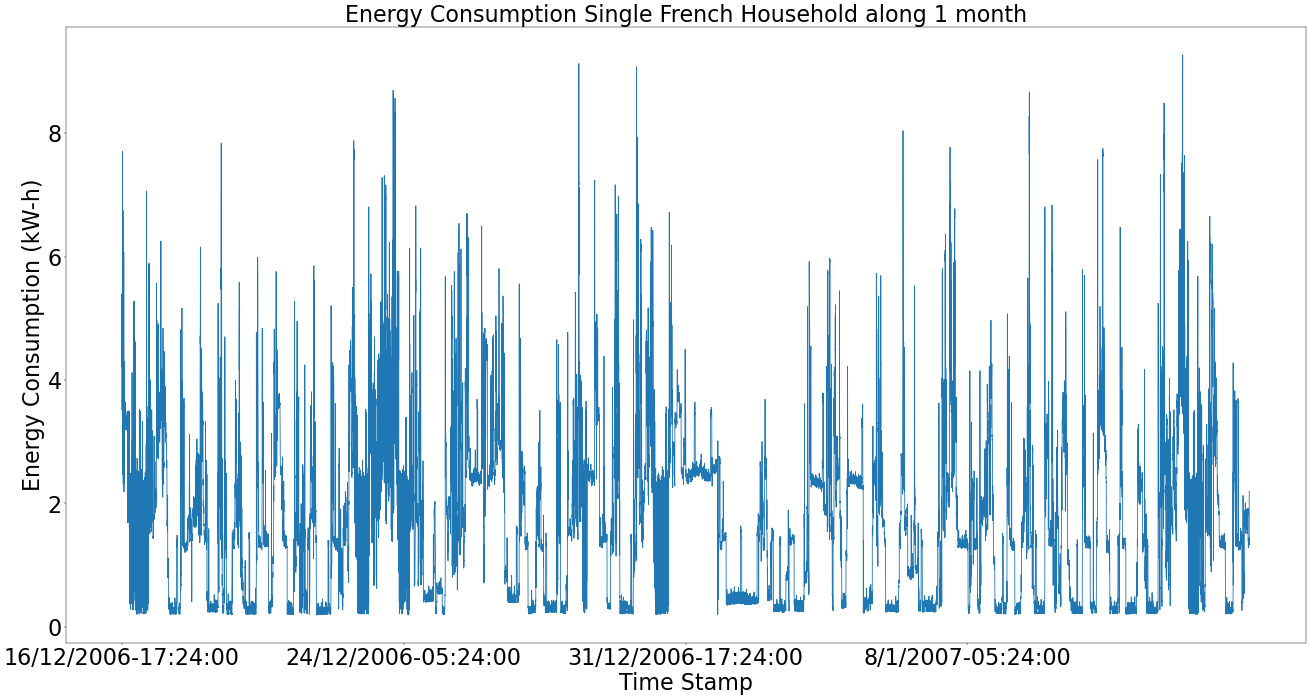

In [12]:
# Energy Consumption of a single hour, single day, single week and single month
n_hour = 60
n_day = 60*24
n_week = 60*24*7
n_month = 60*24*30

plot_energy_vs_time(n_hour, raw_data)
plot_energy_vs_time(n_day, raw_data)
plot_energy_vs_time(n_week, raw_data)
plot_energy_vs_time(n_month, raw_data)

### Taking Dayly Averages to reduce statistical variance
- We observe that the statistical variance of the datapoints is high. At this point we have to make a decision of what we want to predict, in our case this will be to capture the yearly trend and seasonality of the single-household energy consumption. To accomplish this we will take dayly averages, meaning we will take average values every $60 \times 24$ points. A rolling window approach will fail to capture the trend and seasonality due to the high statistical variance of the raw data

In [15]:
step = 60*24  # dayly 
processed_energy = raw_data["Global_active_power"].groupby(raw_data.index // step).mean()
selected_time_stamps = raw_data.iloc[::step, :]["Time_stamp"]
processed_energy_df = processed_energy.to_frame()
selected_time_stamps_df = selected_time_stamps.to_frame()
selected_time_stamps_df.reset_index(inplace=True, drop=True)
processed_data = selected_time_stamps_df.join(processed_energy_df)
processed_data

,Time_stamp,Global_active_power
0,16/12/2006-17:24:00,2.487728
1,17/12/2006-17:24:00,1.619929
2,18/12/2006-17:24:00,1.313087
3,19/12/2006-17:24:00,1.207975
4,20/12/2006-17:24:00,1.574155
...,...,...
1437,22/11/2010-17:24:00,1.162200
1438,23/11/2010-17:24:00,1.281879
1439,24/11/2010-17:24:00,0.928560
1440,25/11/2010-17:24:00,1.249451


In [16]:
# plots energy vs time considering ONLY dayly step data
def plot_dayly_energy_vs_time(n_points, given_data):
    if (n_points == 7):
        feedback = "1 week"
    elif (n_points == 30):
        feedback = "1 month"
    elif (n_points == 365):
        feedback = "1 year"
    elif (n_points == 365*2):
        feedback = "2 years"
    elif (n_points == 365*3):
        feedback = "3 years"
    else:
        feedback = str(n_points) + " days"
    data_frame = given_data.head(n_points)
    plt.figure(figsize=(40,20), dpi=40)
    plt.locator_params(axis='x', nbins=3)
    x_ticks = np.arange(0, n_points, n_points / 4)
    plt.xticks(x_ticks)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.plot(data_frame["Time_stamp"], data_frame["Global_active_power"])
    plt.xlabel("Time Stamp", fontsize=40)
    plt.ylabel("Energy Consumption (kW-h)", fontsize=40)
    plt.title(f"Energy Consumption Single French Household along " + feedback, fontsize=40)
    plt.show()


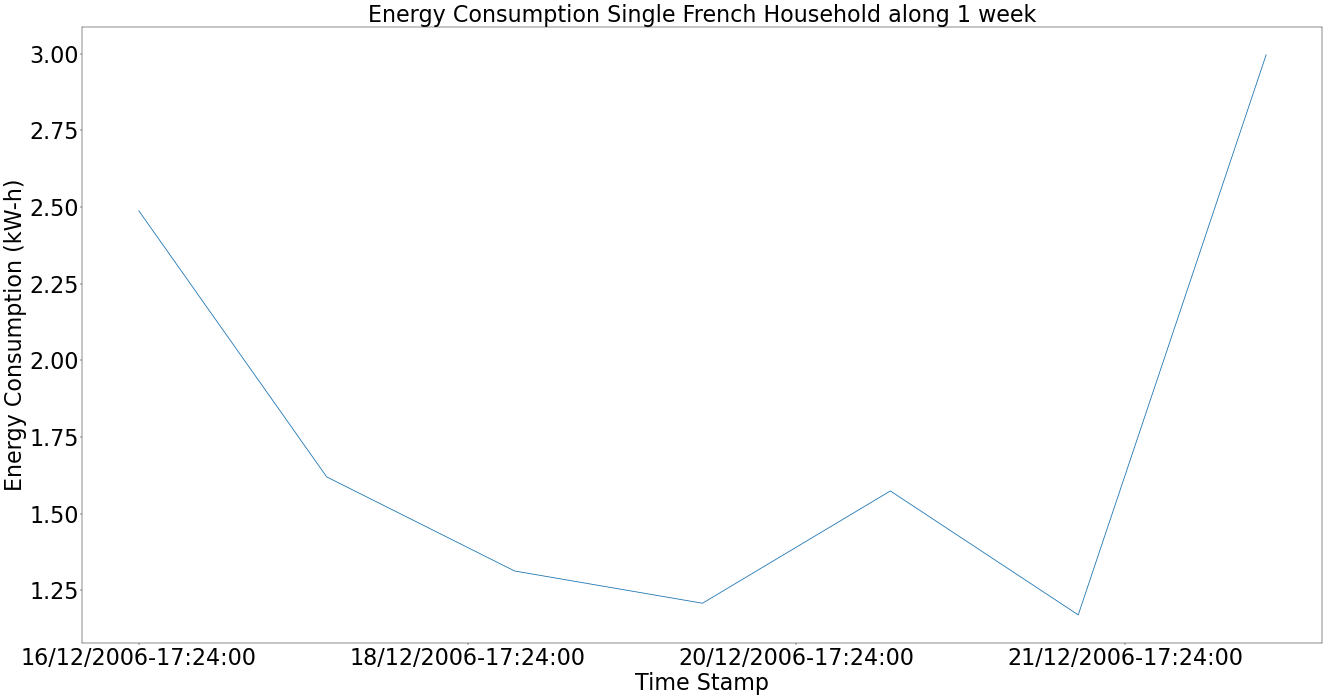

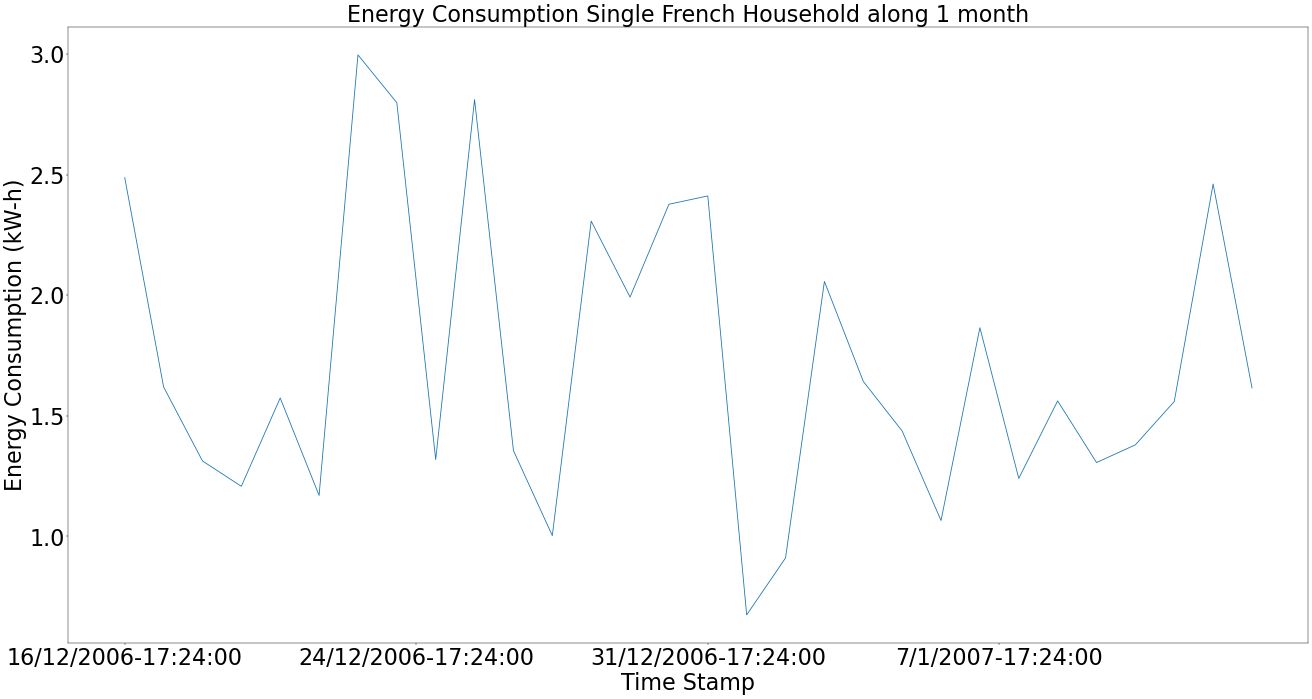

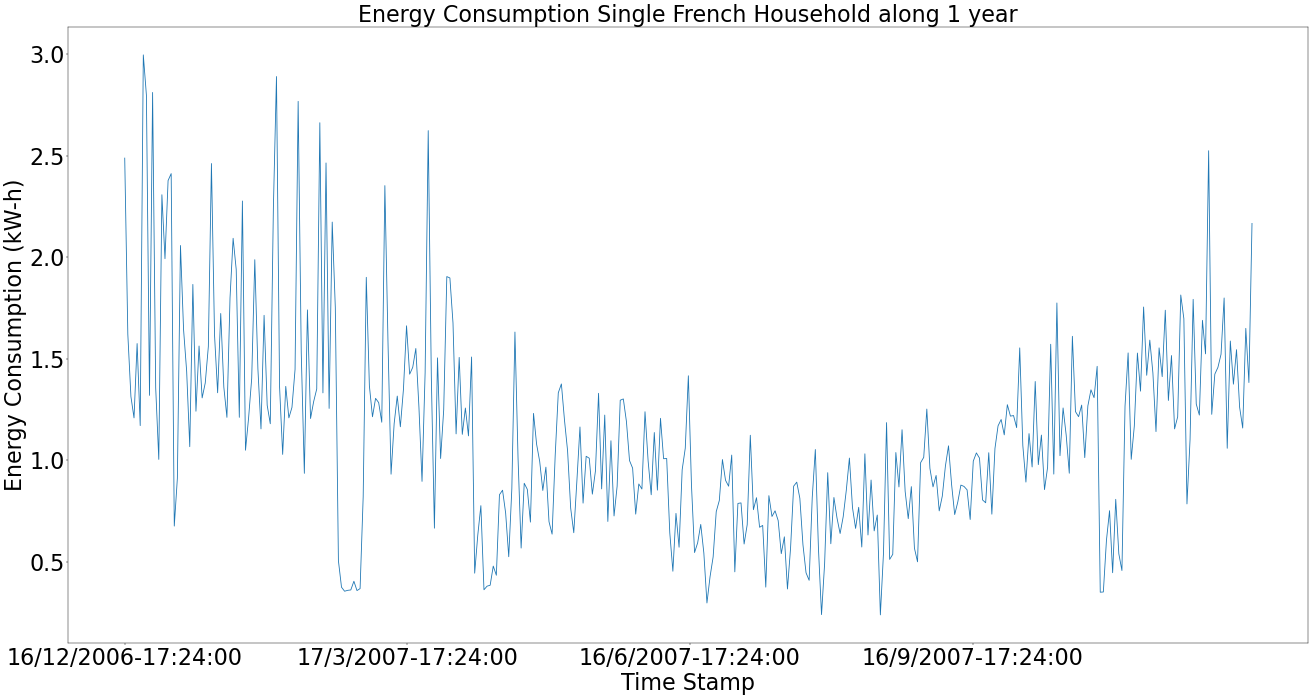

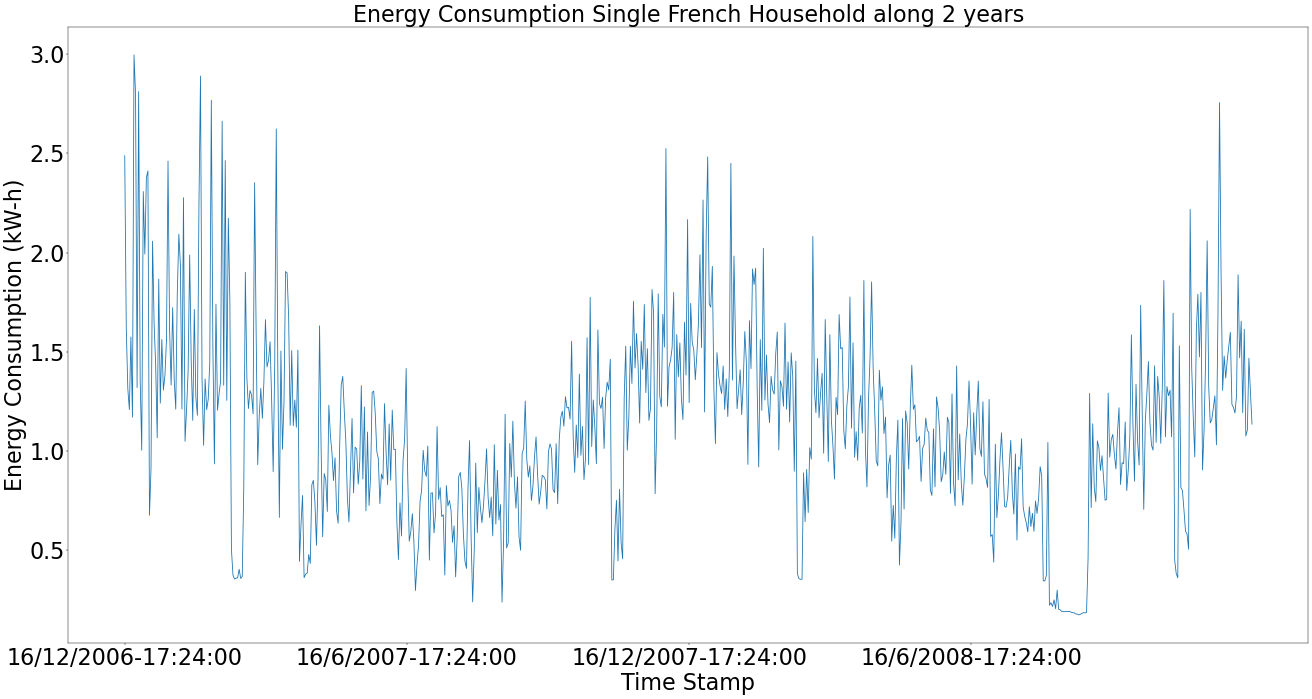

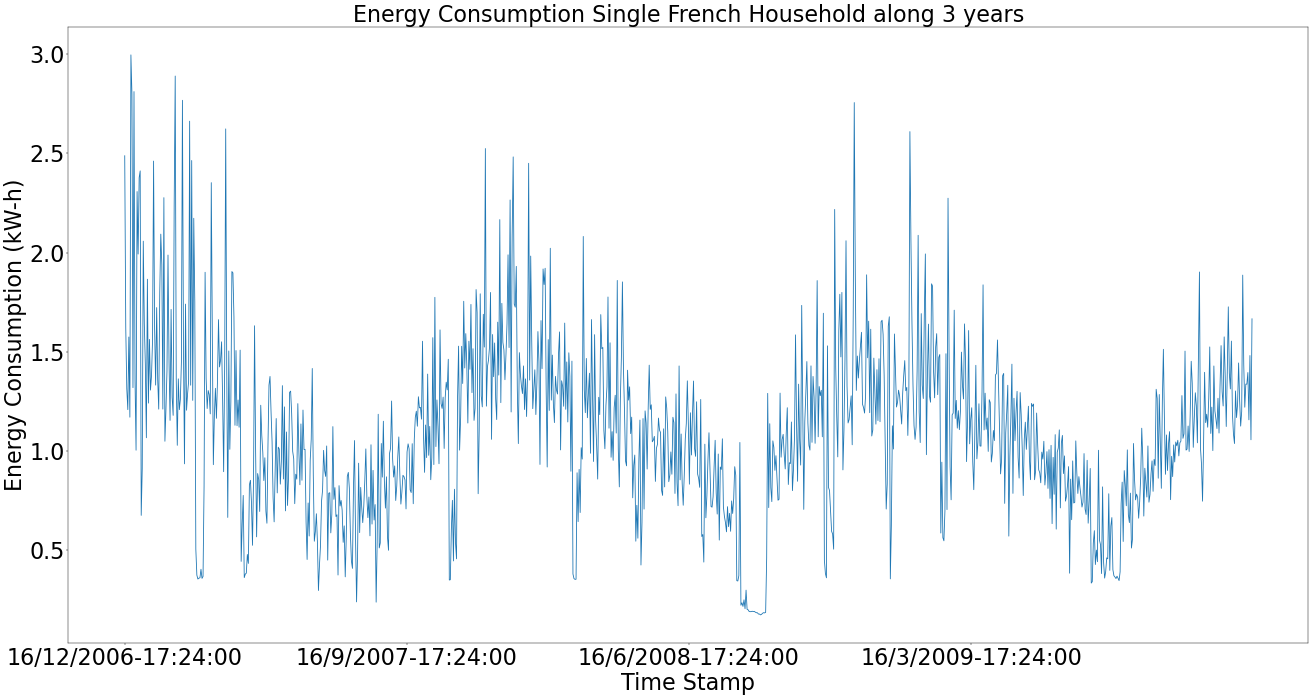

In [17]:
# Energy Consumption of a week, month, year
n_week = 7
n_month = 30
n_one_year = 365
n_two_years = 365*2
n_three_years = 365*3

plot_dayly_energy_vs_time(n_week, processed_data)
plot_dayly_energy_vs_time(n_month, processed_data)
plot_dayly_energy_vs_time(n_one_year, processed_data)
plot_dayly_energy_vs_time(n_two_years, processed_data)
plot_dayly_energy_vs_time(n_three_years, processed_data)

### Rolling Mean
- Now that we have substantially reduce the statistical variance we can introduce the rolling mean to further capture the yearly trend and seasonality of the energy consumption. To achieve this we will calculate the Simple Moving Averages (SMA):

In [18]:
rolling_window = 7  # week
processed_data["Energy"] = processed_data["Global_active_power"].rolling(rolling_window).mean()
processed_data.dropna(inplace=True)
processed_data

,Time_stamp,Global_active_power,Energy
6,22/12/2006-17:24:00,2.996203,1.767007
7,23/12/2006-17:24:00,2.798056,1.811340
8,24/12/2006-17:24:00,1.318883,1.768333
9,25/12/2006-17:24:00,2.811164,1.982344
10,26/12/2006-17:24:00,1.355958,2.003485
...,...,...,...
1437,22/11/2010-17:24:00,1.162200,1.148725
1438,23/11/2010-17:24:00,1.281879,1.170962
1439,24/11/2010-17:24:00,0.928560,1.144698
1440,25/11/2010-17:24:00,1.249451,1.142690


In [21]:
def rolling_effect(n_points, given_data):
    if (n_points == 30):
        feedback = "1 month"
    elif (n_points == 365):
        feedback = "1 year"
    elif (n_points == 365*2):
        feedback = "2 years"
    elif (n_points == 365*3):
        feedback = "3 years"
    else:
        feedback = str(n_points) + " days"
    data_frame = given_data.head(n_points)
    plt.figure(figsize=(40,20), dpi=40)
    plt.locator_params(axis='x', nbins=3)
    x_ticks = np.arange(0, n_points, n_points / 4)
    plt.xticks(x_ticks)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.plot(data_frame["Time_stamp"], data_frame["Global_active_power"])
    plt.plot(data_frame["Time_stamp"], data_frame["Energy"], linewidth=10, color="r" )
    plt.xlabel("Time Stamp", fontsize=40)
    plt.ylabel("Energy Consumption (kW-h)", fontsize=40)
    plt.title(f"Energy Consumption Single French Household along " + feedback, fontsize=40)
    plt.show()

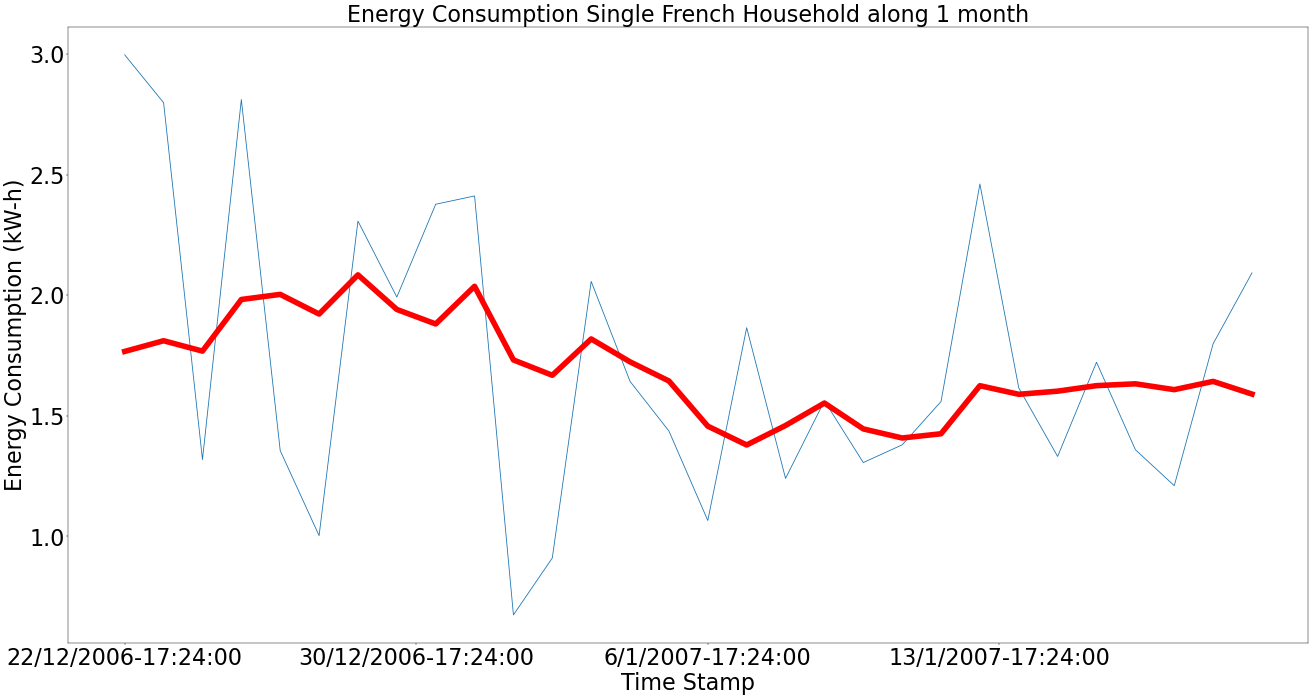

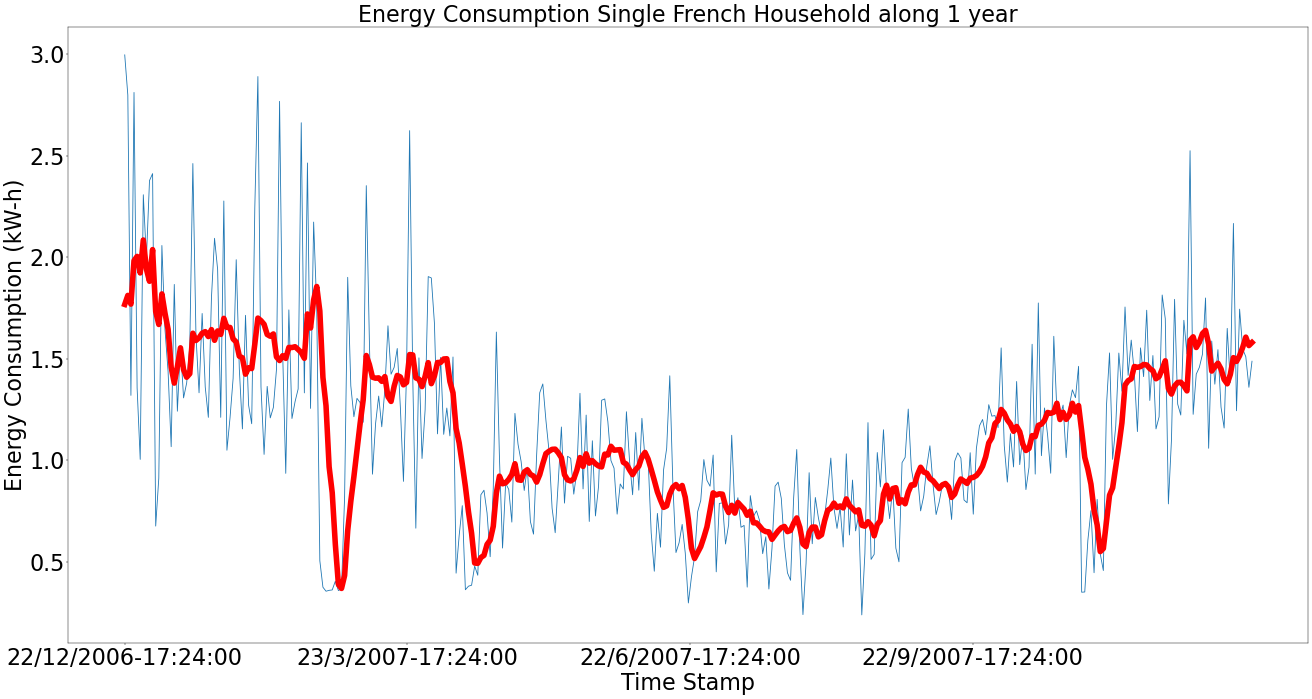

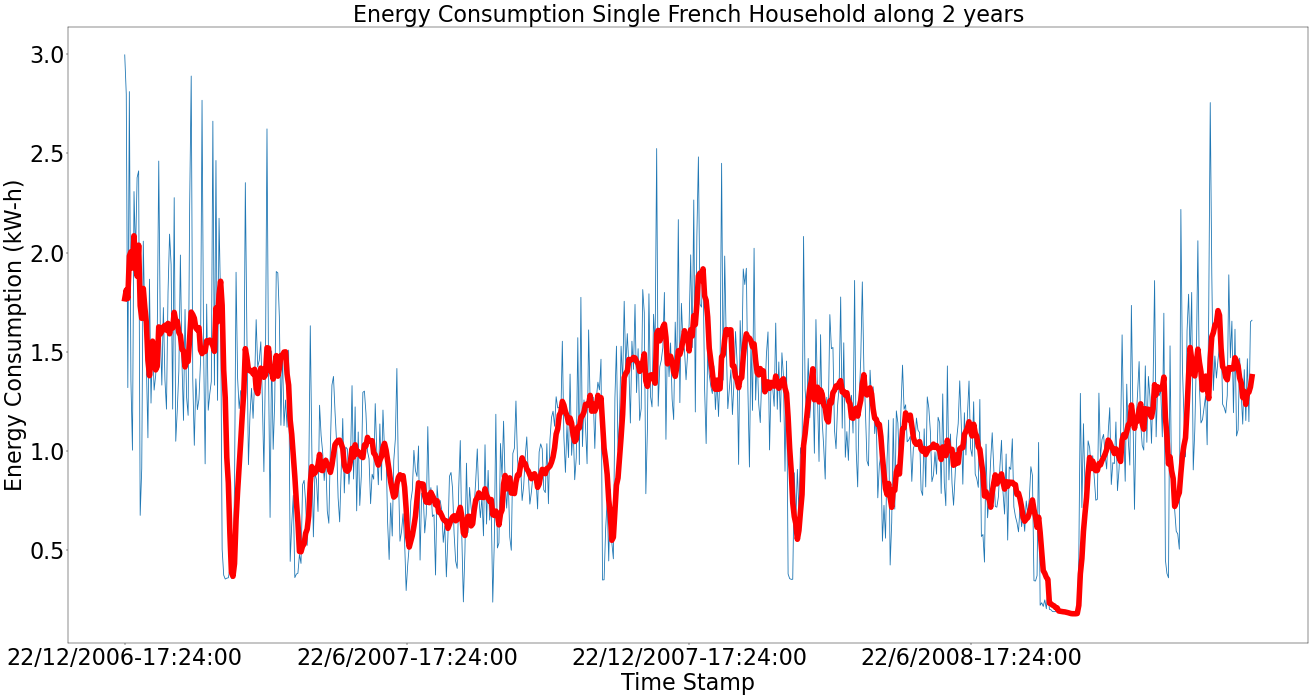

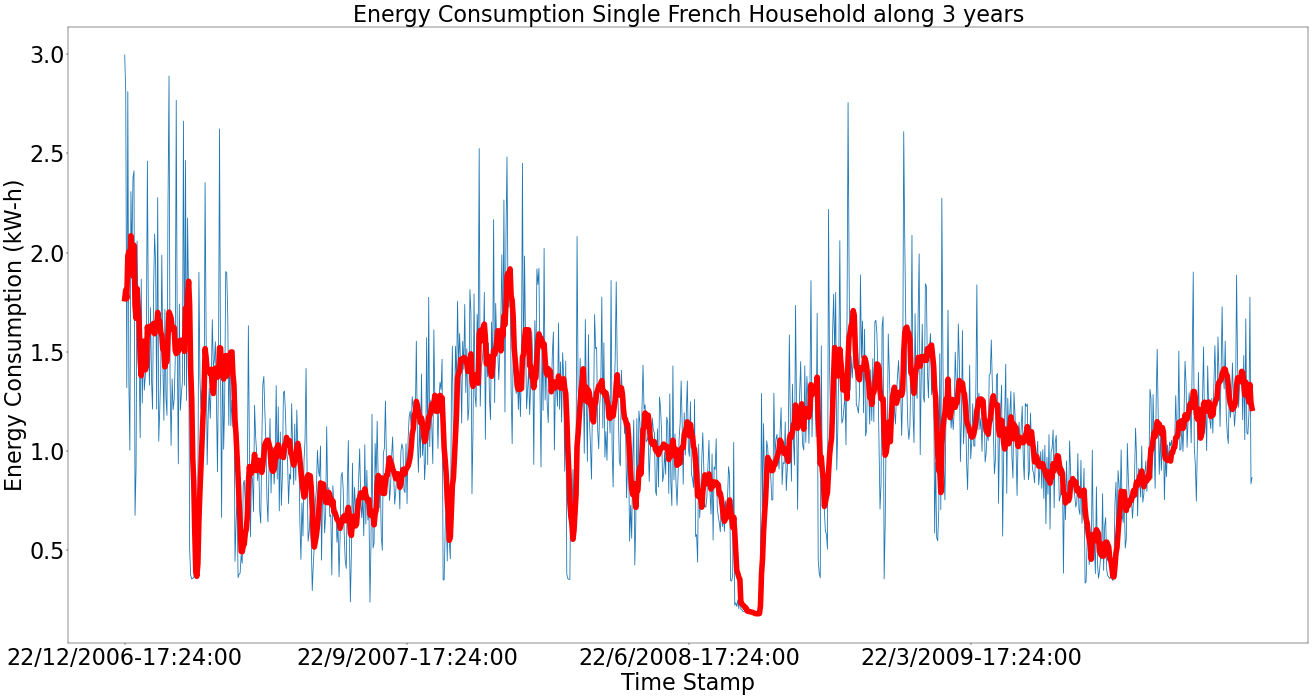

In [ ]:
# Energy Consumption of a month, year, two years, three years
n_month = 30
n_one_year = 365
n_two_years = 365*2
n_three_years = 365*3

rolling_effect(n_month, processed_data)
rolling_effect(n_one_year, processed_data)
rolling_effect(n_two_years, processed_data)
rolling_effect(n_three_years, processed_data)

## Machine Learning Application

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

### Normalization and Data Split

### Model Training 

## Conclusions
1. 